Homework 2

Dataset


https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

or with wget:

In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

!wget $data -O car_fuel_efficiency.csv

--2025-10-06 09:35:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: 'car_fuel_efficiency.csv'

     0K .......... .......... .......... .......... ..........  5% 1,40M 1s
    50K .......... .......... .......... .......... .......... 11% 3,25M 0s
   100K .......... .......... .......... .......... .......... 17% 4,54M 0s
   150K .......... .......... .......... .......... .......... 23% 6,22M 0s
   200K .......... .......... .......... .......... .......... 29% 2,54M 0s
   250K .......... .......... .......... .......... .......... 35% 5,43M 0s
   300K .......... .......... .......... .......... .......... 40%  154M 0s
   350K .

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [738]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [739]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')


# Preparing the dataset
Use only the following columns:

* 'engine_displacement',
* 'horsepower',
* 'vehicle_weight',
* 'model_year',
* 'fuel_efficiency_mpg'



In [740]:
df_filtered = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']].copy()

df_filtered


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

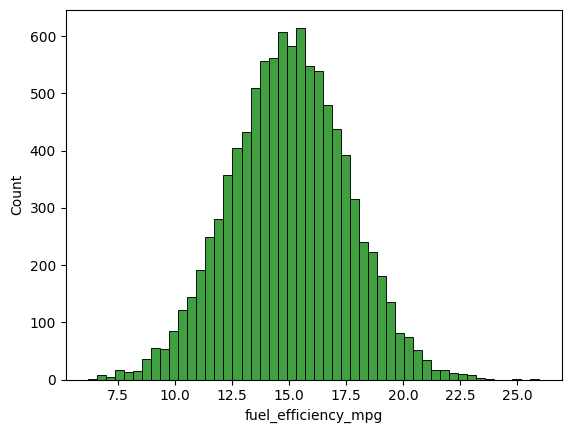

In [741]:
sns.histplot(df_filtered.fuel_efficiency_mpg, bins=50, color='green')

Response: 

* No, it doesn´t have a long tail, it looks like a normal distribution ##

# Question 1

There's one column with missing values. What is it?

* 'engine_displacement'
* 'horsepower'
* 'vehicle_weight'
* 'model_year'

In [742]:
df_filtered.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Response:

* The column with missing values is 'horsepower'

# Question 2

What's the median (50% percentile) for variable 'horsepower'?

* 49
* 99
* 149
* 199

In [743]:
hp_median_value = np.nanpercentile(df_filtered.horsepower.values, 50)

hp_median_value

np.float64(149.0)

Response:

## 149

# Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

Verifying the length of df

In [745]:
n = len(df_filtered)
n

9704

creating the dataframe and assigning the index of initial df for new ones splited

In [746]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

creating an index with sequence numbers with the length of dataframe, seeding with 42 and shuffling it

In [747]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

verifying shuffled idxs

In [748]:
idx[:n_train], idx[n_train:n_train+n_val], idx[n_train+n_val:]

(array([ 483, 7506, 8795, ..., 6735, 2052, 1776]),
 array([6163, 3313, 4781, ..., 7541, 1577, 3906]),
 array([3729, 7764, 4358, ..., 5390,  860, 7270]))

Assign the created index to the splited dataframes, so that instead of accessing each row directly, it is now accessed by its index. 

In [749]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

seeing some rows details

In [750]:
df_train.iloc[[5,15]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
4562,180,8.0,120.0,3551.398040,NaN,2013,Asia,Gasoline,All-wheel drive,0.0,12.145734
4129,140,3.0,107.0,1832.649773,16.5,2012,Asia,Gasoline,All-wheel drive,-1.0,20.485270


reseting the indexes

In [751]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

seeing the same rows again

In [752]:
df_train.iloc[[5,15]]

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
5,180,8.0,120.0,3551.398040,NaN,2013,Asia,Gasoline,All-wheel drive,0.0,12.145734
15,140,3.0,107.0,1832.649773,16.5,2012,Asia,Gasoline,All-wheel drive,-1.0,20.485270


saving de original values of the target 'y' = 'fuel_efficiency_mpg'

In [753]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values 
y_test_orig = df_test.fuel_efficiency_mpg.values
y_train_orig.shape, y_val_orig.shape, y_test_orig.shape

((5824,), (1940,), (1940,))

veryfing the values

In [754]:
y_train_orig, y_val_orig, y_test_orig

(array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447]),
 array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
        13.73334321, 15.81604972]),
 array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
        20.50246014, 16.81624056]))

Creating and saving the 'y' target for each split of the data frame and applying the logarithm plus one to obtain shorter values

In [755]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

verifying the lengths

In [757]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

verifying the values

In [758]:
y_train, y_val, y_test

(array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017]),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377]),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043]))

remove the 'fuel_efficiency_mpg' column from each data frame to prevent its misuse and

In [759]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Question 3

We need to deal with missing values for the column from Q1.

We have two options: 

- fill it with 0 or 
- with the mean of this variable.

Try both options.

For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Searching for missing values ​​in the 'horsepower' column

In [762]:
df_train.horsepower.isnull().sum(), df_val.horsepower.isnull().sum(), df_test.horsepower.isnull().sum()

(np.int64(429), np.int64(136), np.int64(143))

filling missing values with zeros and the mean of horsepower column

In [763]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']
X_train_zeros = df_train[base].fillna(0).values
X_train_mean = df_train[base].fillna(df_train.horsepower.mean()).values

'For computing the mean, use the training only!'

checking that columns are numerical

In [764]:
df_train.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
dtype: object

taking a look at the shape

In [765]:
X_train_zeros.shape, X_train_mean.shape

((5824, 4), (5824, 4))

Taking a look at the shape of the first column of the matrix, whose missing values ​​were filled with zeros.

In [766]:
X_train_zeros.shape[0]

5824

taking a look at the values of GRAM Matrix

In [767]:
xtxz=X_train_zeros.T.dot(X_train_zeros)
xtxz


array([[2.45926600e+08, 1.60732070e+08, 3.49103053e+09, 2.33622676e+09],
       [1.60732070e+08, 1.25381178e+08, 2.42349316e+09, 1.62284105e+09],
       [3.49103053e+09, 2.42349316e+09, 5.40927359e+10, 3.52219266e+10],
       [2.33622676e+09, 1.62284105e+09, 3.52219266e+10, 2.35636378e+10]])

taking a look at the inverse ok GRAM Marix

In [768]:
xtxz_inv = np.linalg.inv(xtxz)
xtxz_inv

array([[ 6.99418505e-08,  8.57333446e-10,  5.27710913e-11,
        -7.07233915e-09],
       [ 8.57333446e-10,  7.34769349e-08,  1.15631210e-10,
        -5.31823933e-09],
       [ 5.27710913e-11,  1.15631210e-10,  6.92503894e-10,
        -1.04832105e-09],
       [-7.07233915e-09, -5.31823933e-09, -1.04832105e-09,
         2.67688430e-09]])

Taking a look at the values in the matrix, whose missing values ​​were filled with the mean(average) value of 'horsepower' column.

In [769]:
xtxmean=X_train_mean.T.dot(X_train_mean)
xtxmean

array([[2.45926600e+08, 1.73604883e+08, 3.49103053e+09, 2.33622676e+09],
       [1.73604883e+08, 1.34975178e+08, 2.61742080e+09, 1.75188651e+09],
       [3.49103053e+09, 2.61742080e+09, 5.40927359e+10, 3.52219266e+10],
       [2.33622676e+09, 1.75188651e+09, 3.52219266e+10, 2.35636378e+10]])

taking a look at the inverse ok GRAM Marix

In [770]:
xtxmean_inv = np.linalg.inv(xtxmean)
xtxmean_inv

array([[ 6.99397771e-08,  1.29535494e-09,  5.25261409e-11,
        -7.10902819e-09],
       [ 1.29535494e-09,  2.11593538e-07,  1.80375580e-10,
        -1.61293976e-08],
       [ 5.25261409e-11,  1.80375580e-10,  6.92475688e-10,
        -1.05370141e-09],
       [-7.10902819e-09, -1.61293976e-08, -1.05370141e-09,
         3.52146686e-09]])

linear regression code

In [771]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

Training the model with the dataframe whose missing values ​​were replaced with zeros

In [772]:
w0_z, w_z = train_linear_regression(X_train_zeros, y_train)
y_pred_zeros = w0_z + X_train_zeros.dot(w_z)
y_pred_zeros

array([2.90981589, 2.84278709, 2.93310627, ..., 2.92329662, 3.00305539,
       2.94404905])

Training the model with the dataframe whose missing values ​​were replaced with the mean(average) of the horsepower column

In [773]:
w0_m, w_m = train_linear_regression(X_train_mean, y_train) 
y_pred_mean = w0_m + X_train_mean.dot(w_m)

y_pred_mean         


array([2.90493466, 2.83614915, 2.93281288, ..., 2.92153243, 3.00286793,
       2.94287685])

ploting and compare

<Axes: ylabel='Count'>

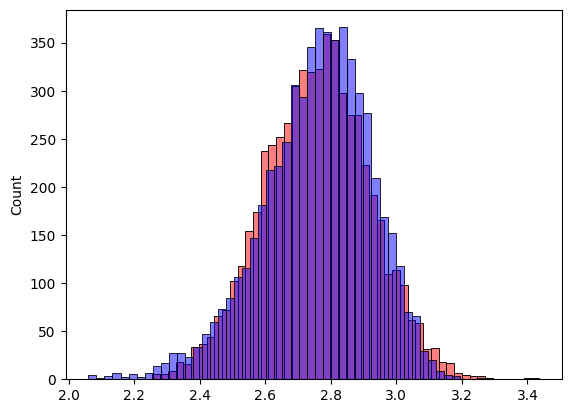

In [774]:
sns.histplot(y_pred_zeros, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

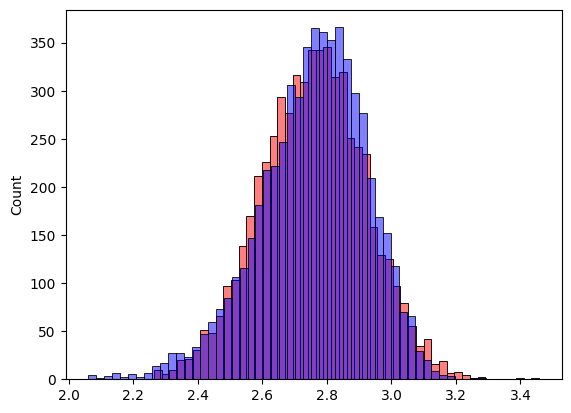

In [775]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)    
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

Response:

* Both predictions seem similar but one of them, completed with zero values, looks better, even though it is less in line with reality since a car cannot not have horsepower.

'Use the validation dataset to evaluate the models and compare the RMSE of each option.'

copying rmse function

In [776]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

applying rmse with training dataset

In [777]:
rmse(y_train, y_pred_zeros)

np.float64(0.0390863253926525)

Copying a function to prepare a dataframes

In [778]:
def prepare_X(df):
    df_num = df[base] # select numerical columns
    df_num = df_num.fillna(0) # fill missing values with 0 
    X = df_num.values # get numpy array
    return X # return X

retraining with df_train

In [779]:
X_train_zeros = prepare_X(df_train)
w0_z, w_z = train_linear_regression(X_train_zeros, y_train)
w0_z, w_z

(np.float64(3.6646662473835203),
 array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673231e-05]))

training validation dataframe

In [780]:
X_val_zeros = prepare_X(df_val)
y_pred_val_zeros = w0_z + X_val_zeros.dot(w_z)
y_pred_val_zeros

array([2.82641584, 2.75411816, 2.55686533, ..., 2.6745201 , 2.67029761,
       2.85296899])

rmse to compare

In [782]:
rmse(y_val, y_pred_val_zeros)

np.float64(0.03997925782577713)

comapring results

* rmse(y_train, y_pred_zeros) -> 0.0390863253926525

* rmse(y_val, y_pred_val_zeros) -> 0.03997925782577713

looks similar

Round the RMSE scores to 2 decimal digits using round(score, 2)

In [783]:
rmse(y_train, y_pred_zeros).round(2)

np.float64(0.04)

In [784]:
rmse(y_val, y_pred_val_zeros).round(2)

np.float64(0.04)

Which option gives better RMSE?

* Both are equally good

# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: 

- [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [785]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [786]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.039977872016356185)

In [787]:
r = 0.01
X_train= prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.039977872016356185)

In [788]:
score.round(2)

np.float64(0.04)

* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

In [789]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 3.6646662473835203 0.03997925782577713
0.01 3.168813446992994 0.039977872016356185
0.1 1.428836998981398 0.04050873984547376
1 0.22012861947491924 0.041353851508238566
5 0.04624885656830111 0.04150611823273275
10 0.023271722731612255 0.04152680123751592
100 0.0023413689852454607 0.04154575656081053


Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

Response:
    
*  0.01

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 0.001
* 0.006
* 0.060
* 0.600

In [790]:
def prepare_X(df):
    df_num = df[base] # select numerical columns
    df_num = df_num.fillna(0) # fill missing values with 0 
    X = df_num.values # get numpy array
    return X # return X

In [791]:
rmse_scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train_s = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val_s = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test_s = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train_s = np.log1p(df_train_s.fuel_efficiency_mpg.values)
    y_val_s = np.log1p(df_val_s.fuel_efficiency_mpg.values)
    y_test_s = np.log1p(df_test_s.fuel_efficiency_mpg.values)

    df_train_s = df_train_s.drop(columns=['fuel_efficiency_mpg'])
    df_val_s = df_val_s.drop(columns=['fuel_efficiency_mpg'])
    df_test_s = df_test_s.drop(columns=['fuel_efficiency_mpg'])

    X_train_s = df_train_s[base].fillna(0).values
    X_val_s = df_val_s[base].fillna(0).values

    w0_s, w_s = train_linear_regression(X_train_s, y_train_s)
    y_pred_train_s = w0_s + X_train_s.dot(w_s)
    y_pred_val_s = w0_s + X_val_s.dot(w_s)

    rmse_train = rmse(y_train_s, y_pred_train_s).round(3)
    rmse_val = rmse(y_val_s, y_pred_val_s).round(3)
    rmse_scores.append(rmse_val)

    print(s, rmse_train, rmse_val)


0 0.039 0.038
1 0.039 0.039
2 0.039 0.039
3 0.039 0.039
4 0.039 0.037
5 0.039 0.039
6 0.039 0.039
7 0.039 0.038
8 0.039 0.04
9 0.039 0.039


In [792]:
std = np.std(rmse_scores)
round(std, 3)

np.float64(0.001)

Response:

* What's the value of std?

* 0.001

# Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

* 0.15
* 0.515
* 5.15
* 51.5

In [793]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train_q6 = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val_q6 = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test_q6 = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train_q6 = np.log1p(df_train_q6.fuel_efficiency_mpg.values)
y_val_q6 = np.log1p(df_val_q6.fuel_efficiency_mpg.values)
y_test_q6 = np.log1p(df_test_q6.fuel_efficiency_mpg.values)

del df_train_q6['fuel_efficiency_mpg'] 
del df_val_q6['fuel_efficiency_mpg']
del df_test_q6['fuel_efficiency_mpg']

In [795]:
# Combine train and validation sets
df_full_train = pd.concat([df_train_q6, df_val_q6]).reset_index(drop=True)

# Prepare features (fill NAs with 0)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]])

In [796]:
y_full_train = np.concatenate([y_train_q6, y_val_q6])
y_full_train


array([2.42521856, 2.67272928, 2.8443658 , ..., 2.68635934, 2.92279789,
       2.83726248])

In [797]:
# Train regularized linear regression with r=0.001
w0_full, w_full = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0_full, w_full

(np.float64(3.530349564153534),
 array([-4.61531179e-06,  2.26072564e-04, -3.22539112e-04,  8.22789123e-05]))

In [798]:
# Prepare validation features
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print(r, w0, score)


100 0.0023413689852454607 0.03967223909896031


In [800]:
rmse(y_pred, y_test)

np.float64(0.03967223909896031)

What's the RMSE on the test dataset?

Options:

* 0.15 --> The closest RMSE was 0.03967223909896031


Checking the efficiency of the prediction by comparing it with the original

In [807]:
car = df_test.iloc[5].to_dict()
car

{'engine_displacement': 180,
 'num_cylinders': 3.0,
 'horsepower': 188.0,
 'vehicle_weight': 3680.3413805868554,
 'acceleration': 18.0,
 'model_year': 2016,
 'origin': 'Asia',
 'fuel_type': 'Gasoline',
 'drivetrain': 'Front-wheel drive',
 'num_doors': 1.0}

In [808]:
df_small = pd.DataFrame([car])
df_small

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,180,3.0,188.0,3680.341381,18.0,2016,Asia,Gasoline,Front-wheel drive,1.0


In [809]:
X_small =  prepare_X(df_small)

In [810]:
# Predict on test set
y_pred = w0 + X_small.dot(w)
y_pred =y_pred[0]
y_pred



np.float64(2.558015508251228)

In [811]:
np.expm1(y_pred)

np.float64(11.91017174794187)

In [812]:
np.expm1(y_test[5])

np.float64(11.711652790836235)

The prediction is quite close to the original efficiency recorded in the dataset.